In [10]:
"""
Integrantes: Mariana Saavedra, David Herrera
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

def kMeans(D,k,eps,mu=None,max_iterations=500):
    while True:
        t=0
        mu=[]
        for ki in range(k):
            mu.append(np.random.uniform(D.min(0),D.max(0),len(D.min(0))))
        mun=[mu]
    
        for l in range(max_iterations):
            t+=1
            c=[]
            for m in range(k):
               c.append([])
            for j in range(D.shape[0]):
                mini = np.inf
                temp=0
                for i in range(len(mun[t-1])):
                    distancia=np.linalg.norm(D[j]-mun[t-1][i])
                    if distancia<mini:
                        mini=distancia
                        temp=i
                c[temp].append(list(D[j]))
            mu=[]
            for i in range(k):
                sum=np.zeros(len(D[0]))
                for j in c[i]:
                    sum+=np.array(j)
                if len(c[i])!=0:
                    mu.append(list(sum/len(c[i])))
            mun.append(mu)
            
            error=0
            for i in range(len(mun[t])):
                error+=(abs(np.linalg.norm(np.array(mun[-1][i])- np.array(mun[-2][i]))))**2
            if error < eps:
                break
        if min([len(ci) for ci in c])!=0:
            break
    return c,mu

def readCsv(file):
    with open(file) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        Cat=dict()
        for row in csv_reader:
            if line_count == 0:
                line_count += 1
            else:
                for i in range(len(row)):
                    try:
                        float(row[i])
                    except ValueError:
                        try:
                            Cat[i].add(row[i])
                        except:
                            Cat[i]=set([row[i]])
        line_count = 0
        d=[]
        csv_file.seek(0)
        for row in csv_reader:
            if line_count == 0:
                line_count += 1
            else:
                temp=[]
                for i in range(len(row)):
                    try:
                        temp.append(float(row[i]))
                    except ValueError:
                        temp.append(list(Cat[i]).index(row[i]))
                d.append(temp)
    return  d

def distEucl(a1,a2):
    return np.linalg.norm(np.array(a1)-np.array(a2))

def single(Ci,Cj):
    min=np.inf
    for ip in Ci:
        for jp in Cj:
            if ip!=jp:
                distance=distEucl(ip,jp)
                if distance<min:min=distance
    return min
def complete(Ci,Cj):
    maxi=-np.inf
    for ip in Ci:
        for jp in Cj:
            if ip!=jp:
                distance=distEucl(ip,jp)
                if distance>maxi:maxi=distance
    return maxi
def avg(Ci,Cj):
    distance=0
    for ip in Ci:
        for jp in Cj:
            if ip!=jp:distance+=distEucl(ip,jp)
    return distance/(len(Ci)*len(Cj))
def centroid(Ci,Cj):
    return distEucl([sum(i)/len(Ci) for i in zip(*Ci)],[sum(i)/len(Cj) for i in  zip(*Cj)])
def ward(Ci,Cj):
    leCi,leCj=len(Ci),len(Cj)
    return ((leCi*leCj)/(leCi+leCj))*distEucl([sum(i)/len(Ci) for i in zip(*Ci)],[sum(i)/len(Cj) for i in  zip(*Cj)])**2

def triangulo(D):
    n=len(D)
    arr=np.empty([n,n])
    for i in range(n):
        for j in range(n):
            if j!=i:
                if j>i:
                    arr[j][i]=arr[i][j]=distEucl(D[i],D[j])
            else:
                arr[i][j]=np.Inf
    return  arr

def lanceWilliams(i,j,Cr,matri,C,alphai=None,alphaj=None,beta=None,gama=None,dist=None):
    if type(dist)== str:
        leCi,leCj,leCr=len(C[i]),len(C[j]),Cr-2
        if dist=='single':alphai,alphaj,beta,gama=1/2,1/2,0,-1/2
        if dist=='complete':alphai,alphaj,beta,gama=1/2,1/2,0,1/2
        if dist=='avg':alphai,alphaj,beta,gama=leCi/(leCi+leCj),leCj/(leCi+leCj),0,0
        if dist=='centroid':alphai,alphaj,beta,gama=leCi/(leCi+leCj),leCj/(leCi+leCj),(-leCi*leCj)/(leCi+leCj)**2,0
        if dist=='ward':alphai,alphaj,beta,gama=(leCi+leCr)/(leCi+leCj+leCr),(leCj+leCr)/(leCi+leCj+leCr),(-leCj)/(leCi+leCj+leCr),0
        temp=[]
        for r in range(Cr):
            if r != i:
                if r!=j:
                    res=alphai*matri[i,r]+alphaj*+matri[j,r]+beta*matri[i,j]+gama*abs(matri[i,r]-matri[j,r])
                    temp.append(res)
            else:
                temp.append(np.inf)
    else:
        temp=[]
        for r in range(Cr):
            if r != i:
                if r!=j:
                    res=alphai*matri[i,r]+alphaj*+matri[j,r]+beta*matri[i,j]+gama*abs(matri[i,r]-matri[j,r])
                    temp.append(res)
            else:
                temp.append(np.inf)
       
                
    return temp

def agglomerativeClustering1(D, dist, k=1):
    total=[]
    global Ci,Cj
    C=[]
    for point in D:
       C.append([point])
    total.append(C)
    while len(C)!=k and k<=len(C):
        cjdist=np.inf
        for indC  in range (len(C)):
            minDistance=np.inf
            for jndC  in range (len(C)):
                if jndC>indC:
                    dsita=dist(C[indC],C[jndC])
                    if dsita<minDistance:
                        minDistance=dsita
                        if dsita<cjdist:
                            Ci,Cj,cjdist=indC,jndC,dsita
        C[Ci]=C[Ci]+C[Cj]
        C.remove(C[Cj])
        total.append(C)
    return total
def agglomerativeClustering2(D, alpha, beta, gamma, k=1):
    total=[]
    C=[]
    for point in D:
       C.append([point])
    total.append(C)
    tri=triangulo(C)
    while len(C)!=k and k<=len(C):
        Ci,Cj=np.unravel_index(np.argmin(tri,axis=None),tri.shape)
        lan=lanceWilliams(Ci,Cj,len(C),tri,C,alpha,alpha,beta,gamma)
        
        C[Ci]=C[Ci]+C[Cj]
        C.remove(C[Cj])
        
        tri=np.delete(tri,Cj,1)
        tri=np.delete(tri,Cj,0)
        tri[Ci]=lan
        tri[:,Ci]=lan
        total.append(C)
    return total      
def agglomerativeClustering3(D, dist, k=1):
    total=[]
    C=[]
    for point in D:C.append([point])
    tri=triangulo(C)
    total.append(C)
    while len(C)!=k and k<=len(C):
        Ci,Cj=np.unravel_index(np.argmin(tri,axis=None),tri.shape)
        
        lan=lanceWilliams(Ci,Cj,len(C),tri,C,dist=dist)
        C[Ci]=C[Ci]+C[Cj]
        C.remove(C[Cj])
        
        tri=np.delete(tri,Cj,1)
        tri=np.delete(tri,Cj,0)
        tri[Ci]=lan
        tri[:,Ci]=lan
        total.append(C)
    return total
#Funcion para el ultimo punto para no tener que calcular la primera matriz de distancias
def agglomerativeClustering4(D, dist, k=1,tri=None):
    total=[]
    C=[]
    for point in D:C.append([point])
    total.append(C)
    if tri is None:
        tri=triangulo(C)
    matriz=tri.copy()
    while len(C)!=k and k<=len(C):
        Ci,Cj=np.unravel_index(np.argmin(tri,axis=None),tri.shape)
        
        lan=lanceWilliams(Ci,Cj,len(C),tri,C,dist=dist)
        C[Ci]=C[Ci]+C[Cj]
        C.remove(C[Cj])
        
        tri=np.delete(tri,Cj,1)
        tri=np.delete(tri,Cj,0)
        tri[Ci]=lan
        tri[:,Ci]=lan
        total.append(C)
    return total,matriz

def plotClusters2D(C,dimX,dimY):
    colors=['yellow','blue','black','red','orange']
    mispuntos=[]
    misclusters=[]
    for c in range(len(C)):
        for point in C[c]:
            mispuntos.append(point)
            misclusters.append(c)
    x_p=pd.DataFrame(mispuntos)
    x_p["cluster"]=misclusters
    columns=[]
    for dim in range(len(C[0][0])):columns.append(dim)
    columns.append("cluster")
    x_p.columns = columns
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1) 
    for i in range(0,len(C)):
        indicesToKeep = x_p["cluster"] == i
        ax.scatter(x_p.loc[indicesToKeep, dimX], x_p.loc[indicesToKeep, dimY],c=colors[i] ,s = 50)
    ax.set_xlabel("Dim"+str(dimX))
    ax.set_ylabel("Dim"+str(dimY))
    plt.title(str(len(C))+" clusters")
    ax.grid()
def plotClusters3D(C,dimX,dimY,dimZ):
    if len(C[0][0])>=3:
        colors=['yellow','blue','black','red','orange']
        mispuntos=[]
        misclusters=[]
        for c in range(len(C)):
            for point in C[c]:
                mispuntos.append(point)
                misclusters.append(c)
        x_p=pd.DataFrame(mispuntos)
        x_p["cluster"]=misclusters
        columns=[]
        for dim in range(len(C[0][0])):columns.append(dim)
        columns.append("cluster")
        x_p.columns = columns
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        for i in range(0,len(C)):
            indicesToKeep = x_p["cluster"] == i
            ax.scatter(x_p.loc[indicesToKeep, dimX],x_p.loc[indicesToKeep, dimY],x_p.loc[indicesToKeep, dimZ], c=colors[i],s = 50)
        ax.view_init(elev=40, azim=20)
        ax.set_xlabel("Dim"+str(dimX))
        ax.set_ylabel("Dim"+str(dimY))
        ax.set_zlabel("Dim"+str(dimZ))
        plt.title(str(len(C))+" clusters")
        ax.grid()
    else:
        print("*------------- 3D mas dimensiones necesarias--------------*")
"""
Primero encuentro los centros de los clusters
Luego encuentro las medias en cada dimension segun los centros de los clusters
y encuentro las dimensiones donde la distancia sea mayor entre la media de la dimension
y la media de los clusters

Creo que permite una separacion considerable dado que encuentro la dimension donde
las medias de los clusters estan mas alejadas 
"""
def getBestProjection(C):
    dimensiones=len(C[0][0])
    mediasDimensiones=[]
    mediasCluster=[]
    for c in range(len(C)):
        mediasCluster.append([sum(i)/len(C[c]) for i in zip(*C[c])])
    for dim in range(dimensiones):
        mediasDimensiones.append(abs(sum(row[dim] for row in mediasCluster))/len(C))
    distDimClus=[]
    for dim in range(dimensiones):
        suma=0
        for c in range(len(C)):
            suma+=distEucl([mediasDimensiones[dim]],[sum(i)/len(C[c]) for i in zip(*C[c])][dim])
        distDimClus.append(suma)
    orden=distDimClus.copy()
    orden.sort(reverse=True)
    return distDimClus.index(orden[0]),distDimClus.index(orden[1]),distDimClus.index(orden[2])
"""
-Mall_Customers.csv:
Me quedaria con:
Gender,Age,Annual Income (k$),Spending Score (1-100)
Dado que permiten idientificar estructuras mas distintas gracias a su variedad de datos
ya que por ejemplo el "ID" es un dato autonumerico, que al parecer no otorga informacion extra a los datos

-delayedflights-small.csv
Quitaria "year","month","UniqueCarrier","Cancelled","CancellationCode"
"Diverted" ya que todos los registros muestran un mismo valor

-riddle.csv
En este dataset es complicado decidir con que dimensiones trabajar dado que son solo 
datos no tiene metada,asi que no hay informacion  para distingirlos y saber cuales son decisivos
para la toma de decisiones aunque se podria ver por lo menos si hay alguna columna con el mismo 
dato y asi eliminarla
"""

'\n-Mall_Customers.csv:\nMe quedaria con:\nGender,Age,Annual Income (k$),Spending Score (1-100)\nDado que permiten idientificar estructuras mas distintas gracias a su variedad de datos\nya que por ejemplo el "ID" es un dato autonumerico, que al parecer no otorga informacion extra a los datos\n\n-delayedflights-small.csv\nQuitaria "year","month","UniqueCarrier","Cancelled","CancellationCode"\n"Diverted" ya que todos los registros muestran un mismo valor\n\n-riddle.csv\nEn este dataset es complicado decidir con que dimensiones trabajar dado que son solo \ndatos no tiene metada,asi que no hay informacion  para distingirlos y saber cuales son decisivos\npara la toma de decisiones aunque se podria ver por lo menos si hay alguna columna con el mismo \ndato y asi eliminarla\n'

Mall_Customers.csv
	 k-means ( 2 3 1 )
	 single ( 2 3 1 )
	 complete ( 3 2 1 )
	 avg ( 3 2 1 )
	 centroid ( 2 3 1 )
	 ward ( 3 2 1 )
riddle.csv
	 k-means ( 598 42 627 )
	 single ( 598 42 762 )
	 complete ( 598 42 451 )
	 avg ( 598 42 667 )
	 centroid ( 598 42 211 )
	 ward ( 598 42 306 )
Wall time: 3min 36s


'\nEn la mayoria de casos k=4,5,6,7,8,.. se puede evidenciar una mayor separacion\ncon el algoritmo  agglomerative\nPero para cantidades pequeñas de clusters se ve que k-means lo separa mas k=2,3\n'

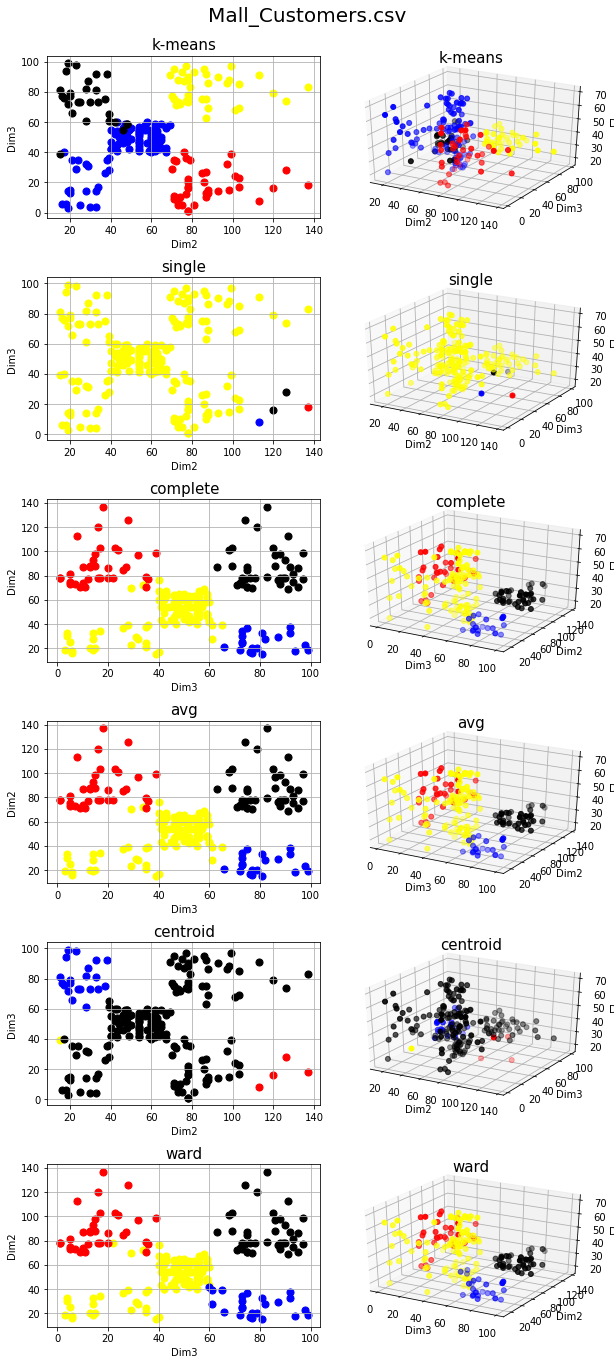

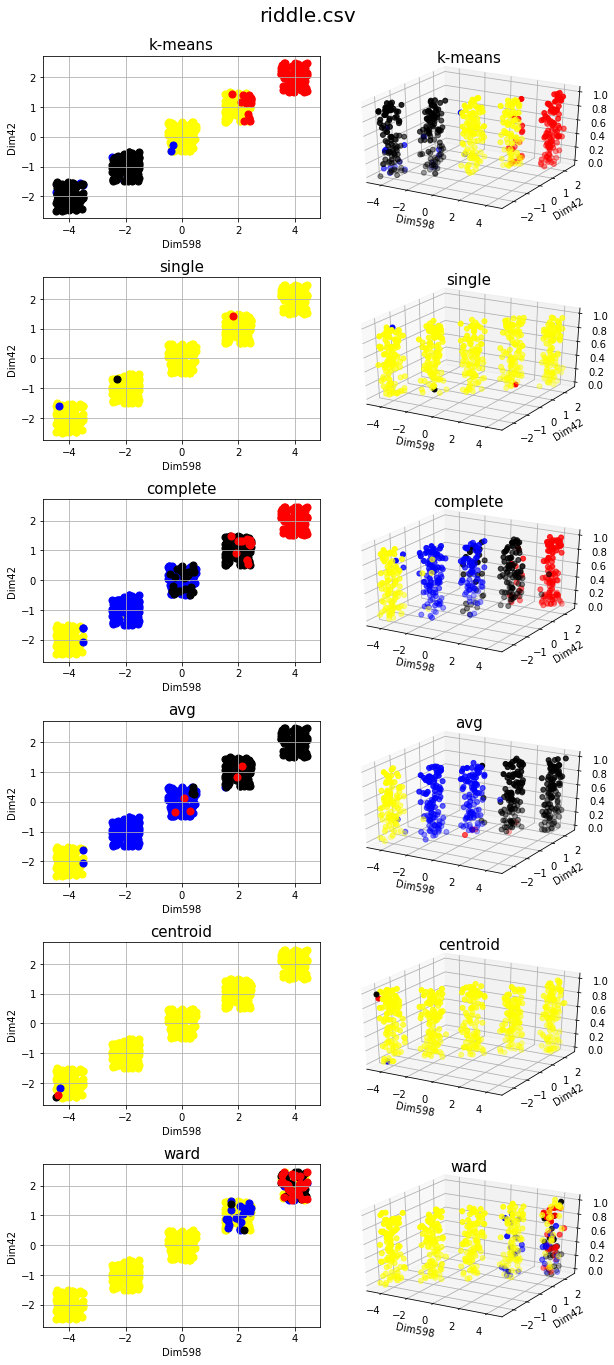

In [15]:
%%time
# files=["Mall_Customers.csv","riddle.csv","delayedflights-small.csv"]
files=["Mall_Customers.csv","riddle.csv"]
dists=["k-means","single","complete","avg","centroid","ward"]
colors=['yellow','blue','black','red','orange']
k=4
for file in files:
    print(file)
    data=readCsv(file)
    if file=="Mall_Customers.csv":
        data=(np.array(data)[:,[1,2,3,4]]).tolist()
    if file=="delayedflights-small.csv":
        data=np.delete(np.array(data),[0,1,8,21,22],1).tolist()
    fig = plt.figure()
    fig.suptitle(file, fontsize=20)
    fig.set_size_inches(10,20)
    cont=1
    for dist in range(len(dists)):
        print("\t",dists[dist],end=' ( ')
        if dists[dist]!="k-means":
            if dists[dist]=="single":
                C,m=agglomerativeClustering4(data,dists[dist],k)
                C=C[-1]
            else:
                C,nada=agglomerativeClustering4(data,dists[dist],k,m)
                C=C[-1]
        else:
            C,mu=kMeans(np.array(data),k,0.001)
        x,y,z=getBestProjection(C)
        print(x,y,z,')')
        mispuntos=[]
        misclusters=[]
        for c in range(len(C)):
            for point in C[c]:
                mispuntos.append(point)
                misclusters.append(c)
        x_pca = pd.DataFrame(mispuntos)
        x_pca["cluster"]=misclusters
        columns=[]
        for dim in range(len(C[0][0])):columns.append(dim)
        columns.append("cluster")
        x_pca.columns = columns

        # 2d
        ax =  fig.add_subplot(6, 2, cont)
        cont+=1
        for i in range(0,len(C)):
            indicesToKeep = x_pca["cluster"] == i
            ax.scatter(x_pca.loc[indicesToKeep, x], x_pca.loc[indicesToKeep, y],c=colors[i], s = 50)
        ax.set_xlabel("Dim"+str(x))
        ax.set_ylabel("Dim"+str(y))
        ax.set_title(dists[dist],fontsize=15)
        ax.grid()
        # 3d
        ax =  fig.add_subplot(6, 2,  cont,projection='3d')
        cont+=1
        for i in range(0,len(C)):
            indicesToKeep = x_pca["cluster"] == i
            ax.scatter(x_pca.loc[indicesToKeep, x], x_pca.loc[indicesToKeep, y],x_pca.loc[indicesToKeep, z],c=colors[i], s = 25)
        ax.set_xlabel("Dim"+str(x))
        ax.set_ylabel("Dim"+str(y))
        ax.set_zlabel("Dim"+str(z))
        ax.set_title(dists[dist],fontsize=15)
        ax.grid()
        plt.tight_layout(pad=6, w_pad=1, h_pad=1) 
"""
En la mayoria de casos k=4,5,6,7,8,.. se puede evidenciar una mayor separacion
con el algoritmo  agglomerative
Pero para cantidades pequeñas de clusters se ve que k-means lo separa mas k=2,3
"""